In [1]:
import sys
from pathlib import Path

proj_path = Path('/cluster') / 'work' / 'stefandt' / 'pers-pred'
proj_path = proj_path.resolve()
if proj_path not in sys.path: sys.path.append(str(proj_path))

import pandas as pd
from src.utils import get_commons
import matplotlib.pyplot as plt

ImportError: Unable to import required dependencies:
pytz: No module named 'pytz'

In [ ]:
model_name = "deberta"

In [ ]:
paths, constants, config, logger, device = get_commons()

2024-06-03 12:21:30,012 - ArgumentLogger - INFO - Arguments:
2024-06-03 12:21:30,031 - ArgumentLogger - INFO - seed: 42
2024-06-03 12:21:30,031 - ArgumentLogger - INFO - dataframe: {'generate': False, 'mbti_frac': 0.1, 'bigfive_c_frac': 1.0, 'bigfive_s_frac': 1.0}
2024-06-03 12:21:30,032 - ArgumentLogger - INFO - eda: {'generate': False}
2024-06-03 12:21:30,032 - ArgumentLogger - INFO - reduce: {'generate': False, 'use_full': False}
2024-06-03 12:21:30,033 - ArgumentLogger - INFO - preprocessing: {'generate_features': False, 'generate_partially_cleaned': False, 'generate_cleaned': False, 'generate_embeddings': False, 'generate_aggregated': True, 'generate_glove': False, 'generate_filled': True}
2024-06-03 12:21:30,033 - ArgumentLogger - INFO - tokenizer: {'do_lower_case': True, 'padding_side': 'right', 'truncation_side': 'right', 'max_length': 128, 'padding': 'max_length', 'truncation': True}
2024-06-03 12:21:30,033 - ArgumentLogger - INFO - split: {'train': 0.8, 'test': 0.1}
2024-06-0

device: cpu


In [ ]:
data = pd.read_csv(paths['new']['preprocessed'], header=[0, 1], index_col=0)

In [49]:
post_counts = data.groupby(('AUTHOR', 'AUTHOR')).size()
data[('STATS', 'posts')] = data[('AUTHOR', 'AUTHOR')].map(post_counts)

In [51]:
data.to_csv(paths['new']['preprocessed'])

In [57]:
data.columns

MultiIndex([('AUTHOR',             'AUTHOR'),
            ( 'STATS',              'chars'),
            ( 'STATS',         'uppercased'),
            ( 'STATS',             'emojis'),
            ( 'STATS',              'posts'),
            ( 'STATS',         'duplicates'),
            ( 'STATS',      'word_nonwords'),
            ( 'STATS',      'nonword_words'),
            ( 'STATS',     'nonword_spaces'),
            ( 'STATS', 'space_punctuations'),
            ( 'STATS',           'hashtags'),
            ( 'STATS',               'urls'),
            ( 'STATS',           'mentions'),
            ('TARGET',            'mbtiEXT'),
            ('TARGET',            'mbtiSEN'),
            ('TARGET',            'mbtiTHI'),
            ('TARGET',            'mbtiJUD'),
            ('TARGET',               'cEXT'),
            ('TARGET',               'cNEU'),
            ('TARGET',               'cAGR'),
            ('TARGET',               'cCON'),
            ('TARGET',            

In [56]:
data['TEXT']

KeyError: 'TEXT'

In [7]:
path_small = Path('/cluster/') / 'work' / 'stefandt' / 'pers-pred' / 'data' / 'reduced' / 'cleaned.csv'
path_large = Path('/cluster/') / 'work' / 'stefandt' / 'pers-pred' / 'data' / 'full' / 'cleaned.csv'

In [8]:
small = pd.read_csv(path_small)
large = pd.read_csv(path_large)

/tmp/ipykernel_3802331/603827497.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  large = pd.read_csv(path_large)
/tmp/ipykernel_3802331/603827497.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  small = pd.read_csv(path_small)


In [38]:
small = small.dropna(subset='SOURCE' ,axis=0)
large = large.dropna(subset='SOURCE' ,axis=0)

In [46]:
small = small.loc[small['SOURCE'] != '1.0']
large = large.loc[large['SOURCE'] != '1.0']

In [47]:
small['SOURCE'].loc[small['SOURCE'] == 'pandora'] = 'pandora_small'
large['SOURCE'].loc[large['SOURCE'] == 'pandora'] = 'pandora_large'

/tmp/ipykernel_3802331/646004370.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  small['SOURCE'].loc[small['SOURCE'] == 'pandora'] = 'pandora_small'
/tmp/ipykernel_3802331/646004370.py:1: SettingWithCopyWarning: 
A value is trying to be 

In [48]:
small['SOURCE'].unique()

array(['tw_mbti', 'essays', 'kaggle_mbti', 'pandora_small', 'mypers'],
      dtype=object)

In [49]:
small = small.loc[small['SOURCE'] == 'pandora_small']

In [54]:
pandora = pd.concat([small, large], axis=0, copy=False)

In [ ]:
pandora

In [30]:
small.loc[small['SOURCE'] == 'pandas', 'SOURCE'] = 'pandas_small'

In [27]:
small['SOURCE'].unique()

array(['tw_mbti', 'essays', 'kaggle_mbti', 'pandora', 'mypers', nan,
       '1.0'], dtype=object)

In [ ]:
large.loc[small['SOURCE'] == 'pandas']['SOURCE'] = 'pandas_small'

In [55]:
def plot_thing(data):
    data['LENGTH'] = data['TEXT'].str.len()
    sources = data['SOURCE'].unique()
    for source in sources:
        subset = data[data['SOURCE'] == source]
        subset_counts = subset['LENGTH'].value_counts().sort_index()
        plt.plot(subset_counts.index, subset_counts.values, label=source)

    plt.xlim(1, 600)  
    plt.yscale('log')
    plt.xlabel('Text Length')
    plt.ylabel('Number of posts')
    plt.title('Distribution of Text Lengths by Data Source')
    plt.legend()
    plt.show()

In [57]:
def plot_thing(data):
    data['LENGTH'] = data['TEXT'].str.len()
    sources = sorted(data['SOURCE'].unique())  # Sort sources alphabetically
    for source in sources:
        subset = data[data['SOURCE'] == source]
        subset_counts = subset['LENGTH'].value_counts().sort_index()
        plt.plot(subset_counts.index, subset_counts.values, label=source)

    plt.xlim(1, 600)
    plt.yscale('log')
    plt.xlabel('Text Length')
    plt.ylabel('Number of posts')
    # plt.title('Distribution of Text Lengths by Data Source')
    plt.legend()
    plt.show()

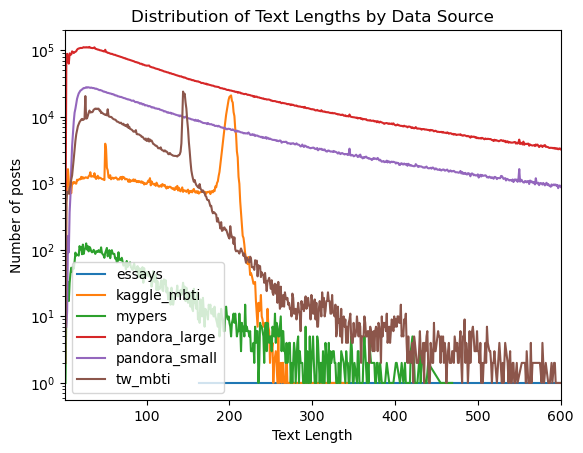

In [58]:
plot_thing(pandora)

In [4]:
data = pd.read_csv(paths['final']['deberta'])

In [5]:
labels = data[constants["label_columns"]]

In [6]:
overlap = labels[constants["bigfive_c_columns"]].notnull().all(axis=1) & labels[constants["bigfive_s_columns"]].notnull().all(axis=1)

In [7]:
labels[overlap].shape[0]

248

In [8]:
overlap = labels[constants["mbti_columns"]].notnull().all(axis=1) & labels[constants["bigfive_s_columns"]].notnull().all(axis=1)

In [9]:
labels[overlap].shape[0]

377

In [10]:
overlap = labels[constants["mbti_columns"]].notnull().all(axis=1) & labels[constants["bigfive_c_columns"]].notnull().all(axis=1)

In [11]:
labels[overlap].shape[0]

0

In [12]:
def show_labels(label_set):
    for label in constants[label_set]:
        mask = labels[label] == 1
        count = labels[mask].shape[0]
        print(label, count)
    print(labels[constants[label_set]].dropna().shape[0])

In [13]:
splits = [pd.read_csv(path, header=[0, 1], index_col=0) for path in paths["split"][model_name].values()]

In [14]:
for split in splits: show_labels("mbti_columns")

mbtiEXT 4870
mbtiSEN 3123
mbtiTHI 8003
mbtiJUD 7415
17741
mbtiEXT 4870
mbtiSEN 3123
mbtiTHI 8003
mbtiJUD 7415
17741
mbtiEXT 4870
mbtiSEN 3123
mbtiTHI 8003
mbtiJUD 7415
17741


In [15]:
labels

,mbtiEXT,mbtiSEN,mbtiTHI,mbtiJUD,cEXT,cNEU,cAGR,cCON,cOPN,sEXT,sNEU,sAGR,sCON,sOPN
0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21679,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21680,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21681,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21682,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
